# Basic usage of `stoflo`: Deer population

This is a simple deer population model, where the deer population is controlled by the birth rate, average life span, and hunting rate.

In [1]:
import numpy as np
import matplotlib.pyplot as pl
from stoflo import model

In [2]:
# Create a model:
r=model()

In [3]:
# Add time grid information:
r.addTime(dt=1,tMax=50)

In [4]:
# Add stock(s):
r.addStock('DeerPopulation',1000)

In [5]:
# Add flow(s):
def birthFun(t,stocks,pars):
    births=pars['birthRate']*stocks['DeerPopulation']
    return births
r.addFlow('birthFun',birthFun,into='DeerPopulation')

def naturalDeathFun(t,stocks,pars):
    deaths=stocks['DeerPopulation']/pars['lifeSpan']
    return deaths
r.addFlow('naturalDeathFun',naturalDeathFun,outfrom='DeerPopulation')

def huntingFun(t,stocks,pars):
    deaths=stocks['DeerPopulation']*pars['huntingRate']
    return deaths
r.addFlow('huntingFun',huntingFun,outfrom='DeerPopulation')


In [6]:
# Add driver(s):

In [7]:
# Add parameters
pars={}
pars['birthRate']=0.24
pars['lifeSpan']=6.
pars['huntingRate']=0.1
r.addPars(pars)

In [8]:
# Run model
r.runEuler()

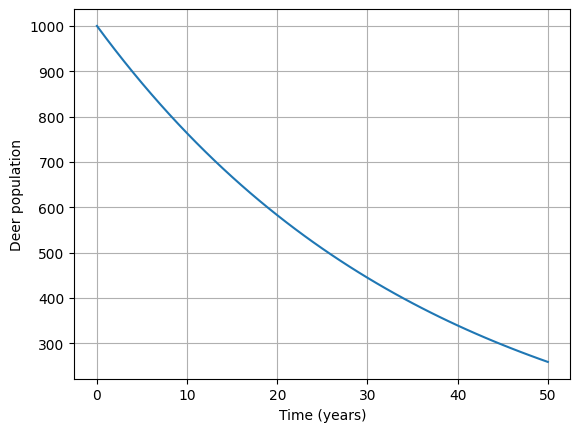

In [12]:
pl.plot(r.stocks['DeerPopulation'])
pl.ylabel('Deer population')
pl.xlabel('Time (years)')
pl.grid()

In [14]:
print(f'Number of dear after 50 years is {r.stocks['DeerPopulation'][-1]:.0f}')

Number of dear after 50 years is 259
